#Queries:
1. Do a great number of restaurants provide online delivery as opposed to offline services?

2. Which types of restaurants are the most favoured by the general public?

3. What price range is preferred by couples for their dinner at restaurants?

Reading Data

In [1]:
import pandas as pd
zomato_data = pd.read_csv("/content/Zomato-data-.csv")

In [2]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
zomato_data.shape

(148, 7)

In [4]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Converting rate column to float

In [5]:
def convert_rate_to_float(rate):
  rate = str(rate).split('/')
  rate = rate[0]
  return float(rate)

zomato_data['rate'] = zomato_data['rate'].apply(convert_rate_to_float)

In [6]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#Conclusion
There is no missing value in dataset

In [8]:
zomato_data['listed_in(type)'].value_counts()

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


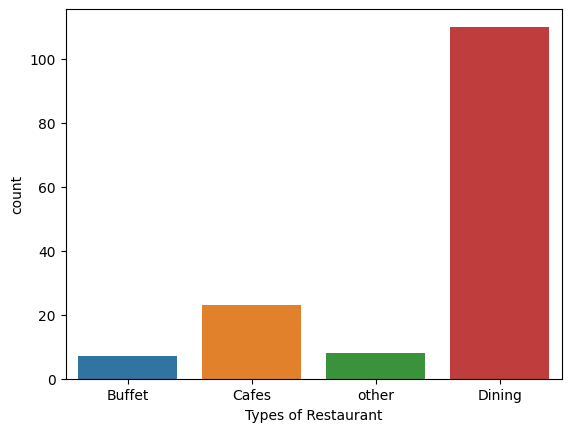

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=zomato_data['listed_in(type)'],hue=zomato_data['listed_in(type)'])
plt.xlabel("Types of Restaurant")
plt.show()

#Conclusion

The majority of the restaurants are falls into the Dining category

In [10]:
zomato_data.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


<Axes: xlabel='votes', ylabel='Count'>

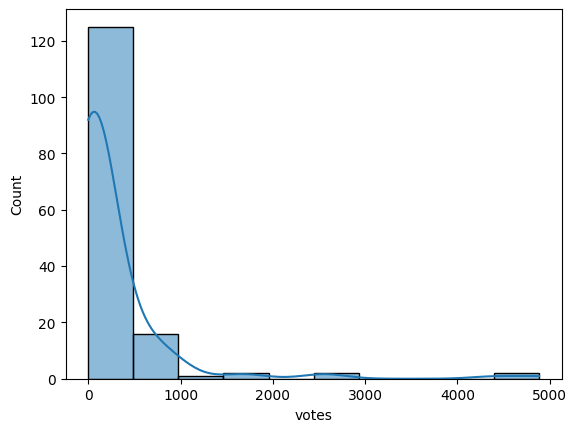

In [11]:
sns.histplot(zomato_data['votes'],kde=True,bins=10)

In [12]:
import numpy as np
def zscore(data):
  zcores = []
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z = (i-mean)/std
    print(z)
    zcores.append(z)
  return zcores

votes_zscores = zscore(zomato_data['votes'])

0.7831415576246322
0.8015615847256196
1.002646880578064
-0.2714049939068891
-0.1516748177504718
0.03252545325940091
-0.39420517458013754
3.5169805798628264
0.09085553907919394
0.367155945594003
0.2105857152356112
-0.1762348538851215
-0.15474482226730302
0.24435576492075453
1.002646880578064
-0.26833498939005784
-0.20232989227818682
-0.18544486743561514
-0.26372998261481106
-0.3865301632880595
-0.3113150526256948
-0.13018478613265333
-0.36350512941182545
-0.3113150526256948
-0.3589001226365786
-0.38960016780489076
-0.29136002326629196
-0.4003451836138
-0.3711801407039035
-0.1793048584019527
-0.07031969805444468
0.37022595011083426
-0.3527601136029162
-0.14246480419997817
0.23054074459501409
-0.05343467321187303
-0.26679998713164227
2.1216635269630406
7.090465837454357
-0.3803901542543971
-0.20232989227818682
-0.36350512941182545
0.03252545325940091
0.42241602689696484
3.5169805798628264
-0.3512251113445006
-0.03194464159405454
0.8276566231186848
0.6357813408167341
-0.030409639335638936


In [13]:
zomato_data['votes_zscores'] = votes_zscores

In [14]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),votes_zscores
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,0.783142
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,0.801562
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,1.002647
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,-0.271405
4,Grand Village,No,No,3.8,166,600,Buffet,-0.151675


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


Text(0, 0.5, 'Votes')

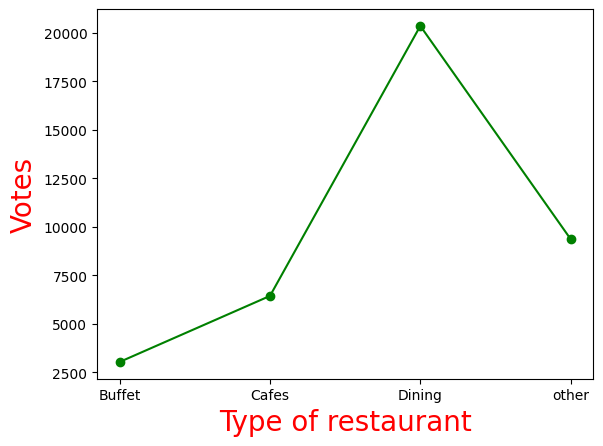

In [15]:
grouped_data = zomato_data.groupby('listed_in(type)')['votes'].sum()
print(grouped_data)
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

#Conclusion
Dining Restaurants are prefered by large number of individuals

In [16]:
threshold = 3
outliers = []
for i in votes_zscores:
  if np.abs(i)>threshold:
    outliers.append(i)
outliers

[np.float64(3.5169805798628264),
 np.float64(7.090465837454357),
 np.float64(3.5169805798628264),
 np.float64(6.34905974663962)]

In [17]:
zomato_data[zomato_data['votes_zscores']>3]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),votes_zscores
7,Onesta,Yes,Yes,4.6,2556,600,Cafes,3.516981
38,Empire Restaurant,Yes,No,4.4,4884,750,other,7.090466
44,Onesta,Yes,Yes,4.6,2556,600,other,3.516981
86,Meghana Foods,Yes,No,4.4,4401,600,Dining,6.349060


#Conclusion
Apart from the Buffet,Cafes and Dinings , Others restaurant contains the highest voting which is the outlier.and on second Dining restaurants with zscore
6.349060

<Axes: xlabel='online_order', ylabel='count'>

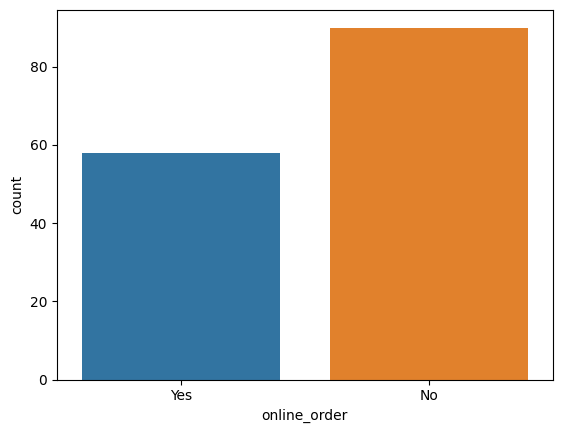

In [18]:
sns.countplot(x=zomato_data['online_order'],hue=zomato_data['online_order'])

In [19]:
zomato_data['online_order'].value_counts()

,count
online_order,
No,90
Yes,58


#Conclusion
Most of the restaurant don't provide online services only 58 restaurants are approx that are providing online services out off 148 restaurants

#Analayze Ratings

<Axes: xlabel='rate', ylabel='Count'>

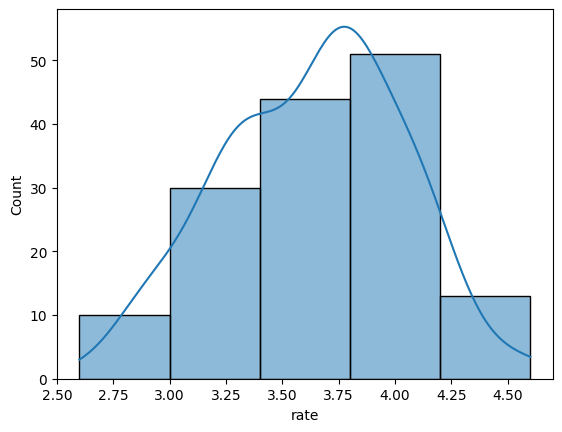

In [23]:
sns.histplot(zomato_data['rate'],bins=5,kde=True)

#Conclusion
The majority of the restaurants received ratings ranging from 3.5 to 4

#Approximate cost for Couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

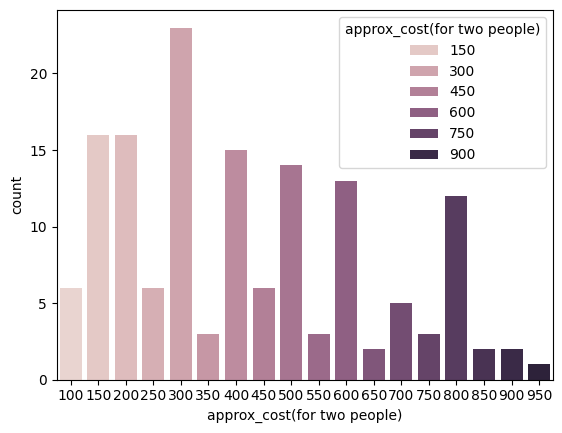

In [28]:
couple_data = zomato_data['approx_cost(for two people)']
sns.countplot(x=couple_data,hue=zomato_data['approx_cost(for two people)'])

#Conclusion
The majority of the couples prefer approximate cost of 300